In [1]:
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import random
import warnings
warnings.filterwarnings("ignore")
import scipy as sp

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Shape of train is {}".format(train.shape))
print("Shape of test is {}".format(test.shape))

Shape of train is (14993, 24)
Shape of test is (3972, 23)


In [4]:
print(train.head())

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [6]:
# Insight_1: There are 14993 (around 15k animals in the dataset)
# Insight_2: There are less names and descriptions (13736 and 14981 respectively) than the number of animals which implies that not all animals have a name

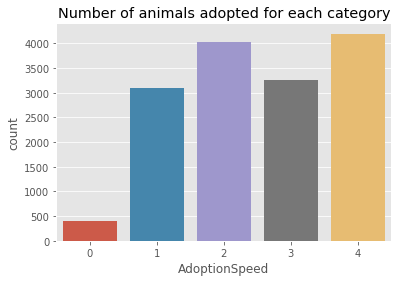

In [7]:
fig, ax = plt.subplots()
ax.set_title("Number of animals adopted for each category")
sns.countplot(x="AdoptionSpeed", data=train, ax=ax)

In [8]:
# Insight_3: For majority of the animals, there was no adoption after 100 days of being listed.

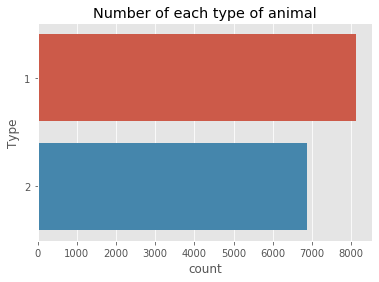

In [9]:
fig1, ax1 = plt.subplots()
ax1.set_title("Number of each type of animal")
sns.countplot(y="Type", data=train, ax=ax1)

In [10]:
# Insight_4: There are more number of dogs than cats in the dataset

In [24]:
adopt_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prep_plot(df, col, adopt_count):
    adopt_count = dict(adopt_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in adopt_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / adopt_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def count_plot(df, x, hue='AdoptionSpeed', title='', adopt_count=adopt_count):
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prep_plot(df, x, adopt_count)


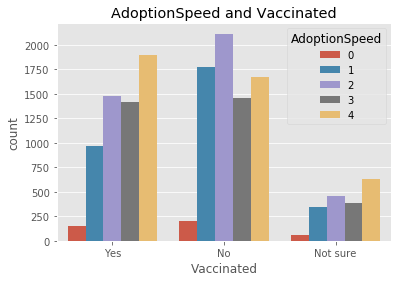

In [25]:
plt.figure();
count_plot(df=train, x='Vaccinated', title='Vaccinated')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Vaccinated');

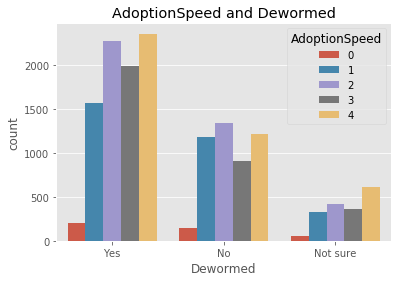

In [26]:
plt.figure();
count_plot(df=train, x='Dewormed', title='Dewormed')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Dewormed');

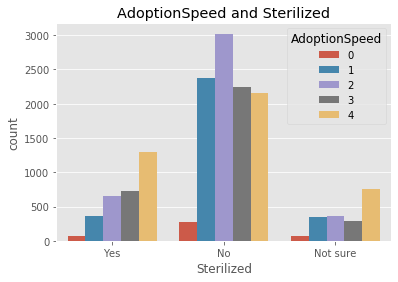

In [27]:
plt.figure();
count_plot(df=train, x='Sterilized', title='Sterilized')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Sterilized');

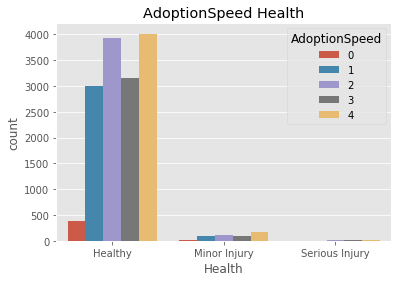

In [28]:
plt.figure();
count_plot(df=train, x='Health', title='Health')
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury']);

Insights for Vaccinated, Dewormed, Sterilized and Health features:
Majority of the animals are healthy as previously discovered. There are very few animals having minor injury. These animals also face less adoption rates. Same is the case with animals having serious injury. There is an adoption preference for:
    1. Non-vaccinated animals
    2. Non-sterilized animals
    3. Dewormed animals
    4. Healthy animals

In [29]:
train.loc[:, ["Color1", "Color2", "Color3"]].head()

,Color1,Color2,Color3
0,1,7,0
1,1,2,0
2,2,7,0
3,1,2,0
4,1,0,0


In [30]:
train.loc[:, ["Color1", "Color2", "Color3"]].describe()

,Color1,Color2,Color3
count,14993.000000,14993.000000,14993.000000
mean,2.234176,3.222837,1.882012
std,1.745225,2.742562,2.984086
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000
75%,3.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000


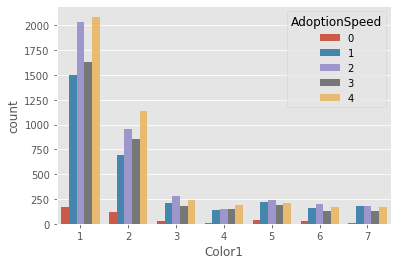

In [31]:
fig, ax1 = plt.subplots()
ax1 = sns.countplot(x="Color1", data=train, hue="AdoptionSpeed", ax=ax1)

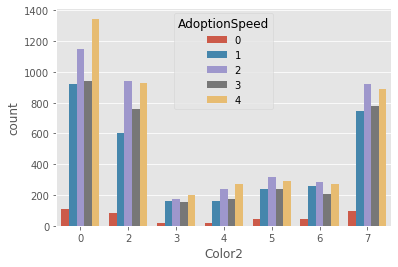

In [32]:
fig, ax1 = plt.subplots()
ax1 = sns.countplot(x="Color2", data=train, hue="AdoptionSpeed", ax=ax1)

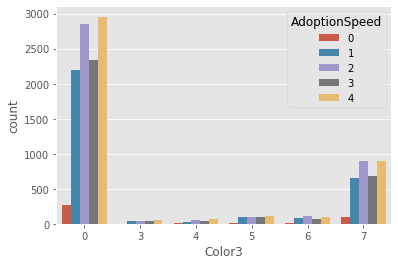

In [33]:
fig, ax1 = plt.subplots()
ax1 = sns.countplot(x="Color3", data=train, hue="AdoptionSpeed", ax=ax1)

In [34]:
color_label = pd.read_csv("color_labels.csv")

In [35]:
print(color_label)

   ColorID ColorName
0        1     Black
1        2     Brown
2        3    Golden
3        4    Yellow
4        5     Cream
5        6      Gray
6        7     White
